In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
X = df.iloc[:, [0,1,2,3,4,5,6,7]].values
Y = df.iloc[:, 8].values

In [27]:
X[0:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [28]:
X.shape

(768, 8)

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [43]:
kfold = KFold(n_splits = 10, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv= kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.604% (5.036%)


In [39]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[98  9]
 [18 29]]


In [40]:
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [34]:
from sklearn import metrics
print ("Accuracy:", metrics.accuracy_score(Y_test, predicted))
print ("Precision:", metrics.precision_score(Y_test, predicted))
print ("Recall:", metrics.recall_score(Y_test, predicted))

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted label')

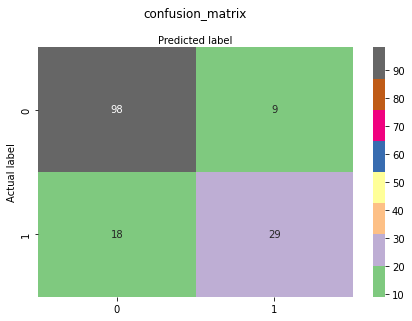

In [35]:
import seaborn as sns
from matplotlib.colors import ListedColormap
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot = True, cmap = "Accent", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('confusion_matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')